In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:

model.fit(X, y)
#Hint: .fit()

LinearRegression()

We need to use fit() function to perform the calculation on the feature values of input data and fit this calculation to the transformer.

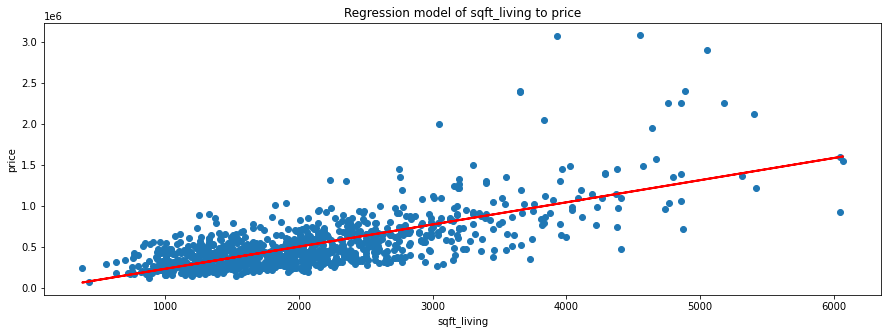

Slope: 269.462
Intercept: -32304.655
Score: 0.497
Mean squared error equals: 57947526161.288


In [3]:
#b)

#Your code:
#resizing figure
plt.rcParams["figure.figsize"] = (15, 5)

#plotting
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Regression model of sqft_living to price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

print('Slope: %.3f' % model.coef_[0])
print('Intercept: %.3f' % model.intercept_)
print('Score: %.3f' % model.score(X, y))
print('Mean squared error equals: %.3f' % mean_squared_error(y, model.predict(X)))

#setting initial size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

Linear regression model of sqft_living to price shows that price will be getting higher and higher when sqft_living encreasing. Linear regression is the simplest variant of regression but widly used.

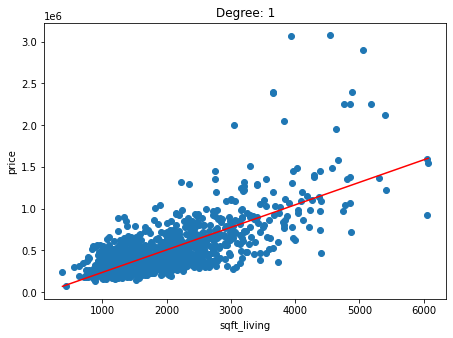

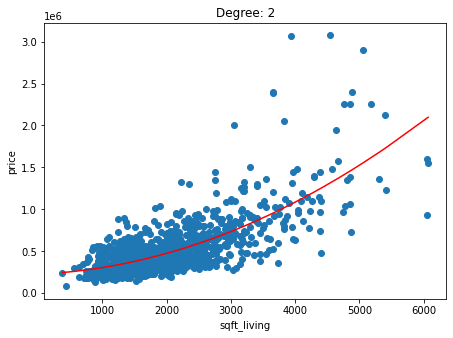

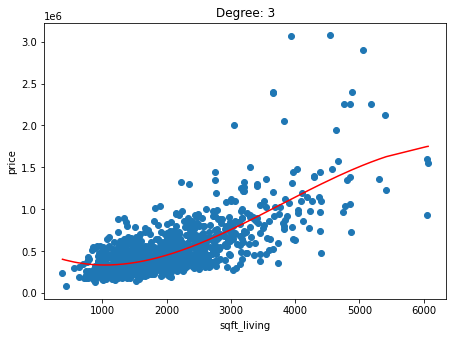

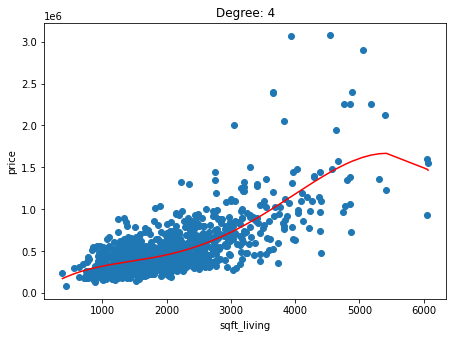

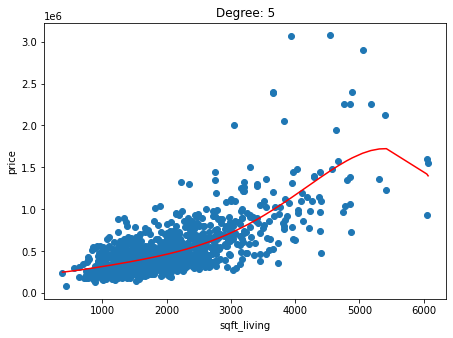

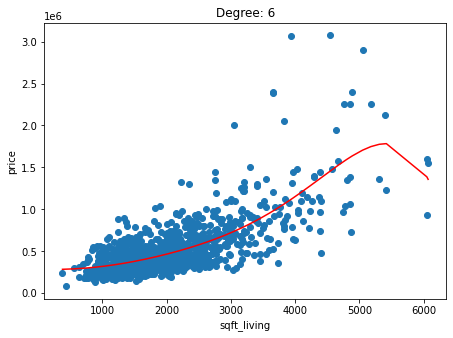

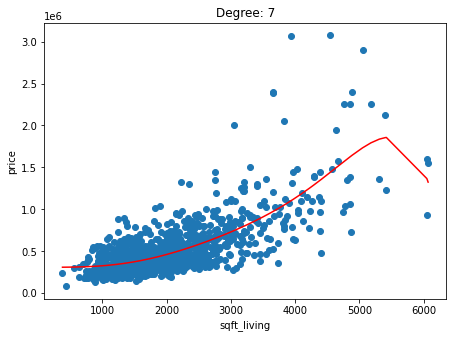

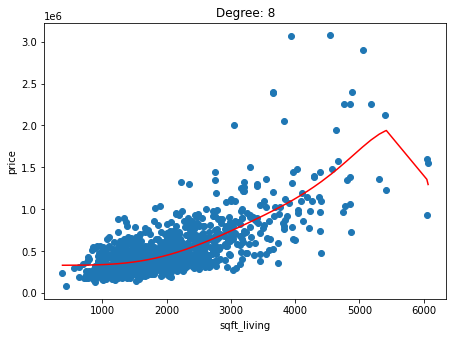

In [4]:
#c)
error = np.array([0, 0, 0, 0, 0, 0, 0, 0])

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    #Your code:
    model2 = LinearRegression().fit(X_order,y)

    y_pred = model2.predict(X_order)

    #sorting
    x_pd = pd.Series(X.flatten())
    y_pred_pd = pd.Series(y_pred.flatten())

    x_sorted = x_pd.sort_values()

    Y_pred = np.array(y_pred_pd[x_sorted.index])
    x_arr = np.array(x_sorted)

    #error
    error[order-1] = mean_squared_error(y, y_pred)
    #plotting
    plt.scatter(X, y)
    plt.plot(x_arr, Y_pred, color='red')
    plt.title('Degree: %i' %order)
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.tight_layout()
    plt.show()
    

As we see polynomial regression models are more accurate than linear but sometimes the higher degree doesn't mean the model is better. Most of houses have sqft_living smaller than 4000, so the regression model is less accurate on the right side, becouse there are less datas. What is more models with 4, 5, 6, 7, 8 degree are very similar, so there is no need to make more calculations and create models with higher degree.

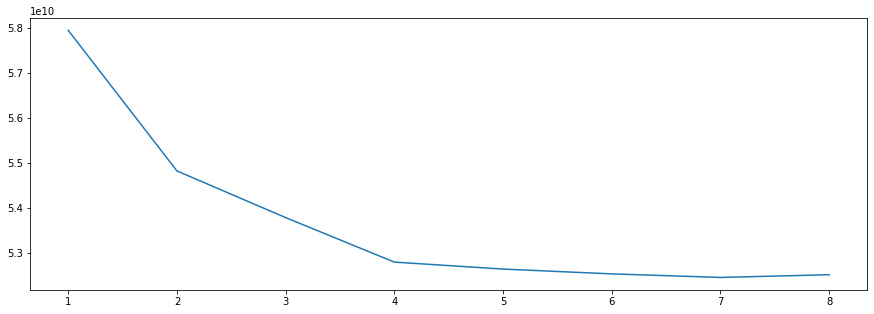

In [5]:
#Your code:
plt.rcParams["figure.figsize"] = (15, 5)

degrees = np.array([1, 2, 3, 4, 5, 6, 7, 8])

plt.plot(degrees, error)
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Error is getting lower if degree is increasing. Since 1 to 4 it is declining rapidly but later slowly and the difference between 4 and 8 degree is not big.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

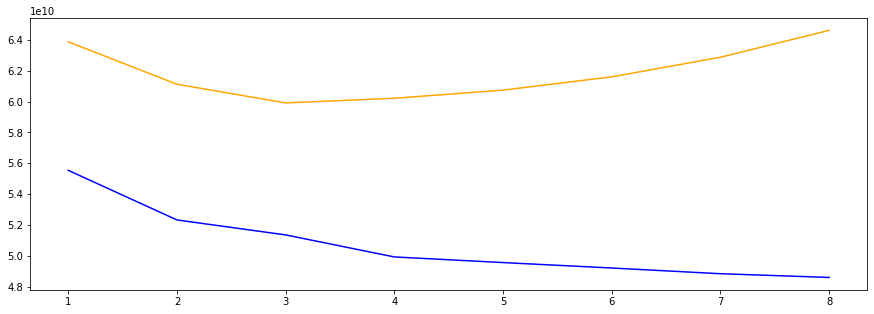

In [11]:
#a)
error_train = np.array([0, 0, 0, 0, 0, 0, 0, 0])
error_test = np.array([0, 0, 0, 0, 0, 0, 0, 0])

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    #Your code:
    model_tr = LinearRegression().fit(X_train, y_train)
    model_te = LinearRegression().fit(X_test, y_test)

    y_train_pred = model_tr.predict(X_train)
    y_test_pred = model_tr.predict(X_test)

    #error
    error_train[order-1] = mean_squared_error(y_train, y_train_pred)
    error_test[order-1] = mean_squared_error(y_test, y_test_pred)

plt.rcParams["figure.figsize"] = (15, 5)

degrees = np.array([1, 2, 3, 4, 5, 6, 7, 8])

#train error - orange
plt.plot(degrees, error_train, color='blue')

#test error - blue
plt.plot(degrees, error_test, color='orange')

plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    


Train error is the biggest in linear regression model and is minimal in polynomial model with degree = 8. It is gradually decreasing since degree 1. Test error is minimal in model with degree = 3. Since degree 1 to 3 is decreasing and since 3 to 8 is increasing. 

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

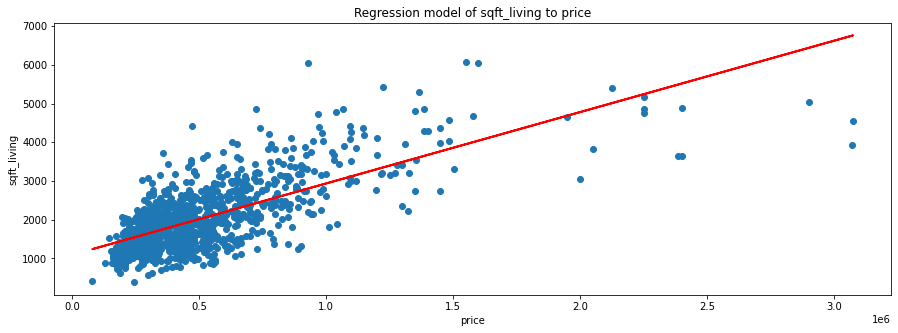

Mean squared error equals: 396407.189


In [38]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
plt.rcParams["figure.figsize"] = (15, 5)

model = LinearRegression()

model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Regression model of sqft_living to price')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

print('Mean squared error equals: %.3f' % mean_squared_error(y, model.predict(X)))

#setting initial size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Linear regression model to predict sqft_living for a given house price shows that genearally sqft_living will be increasing if the price will be higher.

In [39]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:

print("My model:")

X = house_df[['sqft_living', 'sqft_living15', 'waterfront', 'grade', 'bedrooms',]].values.reshape(-1,5)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749267368.97092
My model:
Mean squared error equals: 48003698508.726875


I made polynomial 3-degree model, which uses sqft_living, sqft_living15, waterfront, grade, bedrooms. Mean squared error of the model equals: 48003698508.726875 and is smaller than error of the proposed model. 